In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

#filter for Data Analyst data
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:

df_da["job_posted_month_no"] = df_da["job_posted_date"].dt.month
df_da_exploded = df_da.explode('job_skills')


In [ ]:
df_da_pivot=df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc["Total"] = df_da_pivot.sum(numeric_only=True)
sorted_skills = df_da_pivot.loc["Total"].sort_values(ascending=False).head(10).index.to_list()
df_da_pivot = df_da_pivot[sorted_skills]
df_da_pivot.drop('Total', axis=0, inplace=True)

In [21]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_no')

In [22]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap
job_posted_month,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947
May,6617,4773,4070,3245,2695,2093,1940,979,957,851
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852


In [27]:
df_da_plot = df_da_pivot.iloc[:,:5]

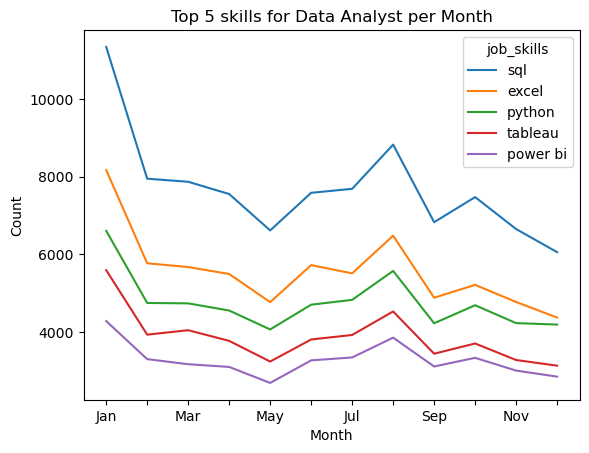

In [28]:
df_da_plot.plot(kind='line')
plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.gca().set_xticks(list(range(0, 12)))
plt.show()

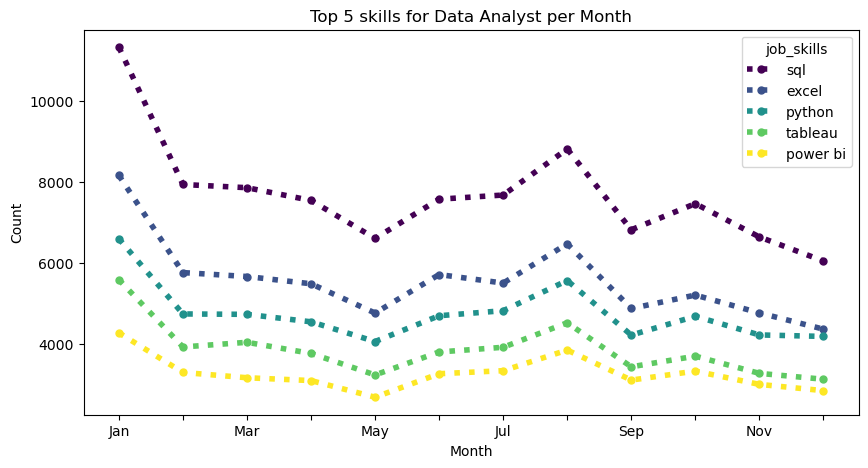

In [38]:
df_da_plot.plot(
  kind='line',
  linewidth=4,
  linestyle=':', #options: '-','--','-.',':'
  colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
  marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
  markersize=5,
  figsize=(10,5)
)
plt.title("Top 5 skills for Data Analyst per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.gca().set_xticks(list(range(0, 12)))
plt.show()

In [46]:
skill_count=20
df_da_skill_stats=(df_da_exploded.groupby(by=['job_skills'])
  .agg(
    median_salary=('salary_year_avg','median'), 
    skill_count=('job_skills','count')
   )
  .sort_values('skill_count',ascending=False)
  .head(skill_count)
)

In [ ]:
df_da_skill_stats

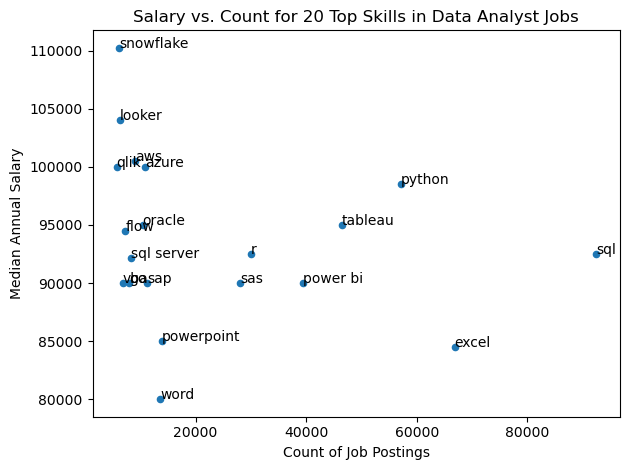

In [48]:
df_da_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for (i,job_skill) in enumerate(df_da_skill_stats.index):
  plt.text(df_da_skill_stats['skill_count'].iloc[i], df_da_skill_stats['median_salary'].iloc[i], job_skill)  

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Annual Salary')
plt.title(f"Salary vs. Count for {skill_count} Top Skills in Data Analyst Jobs")
plt.tight_layout()
plt.show()

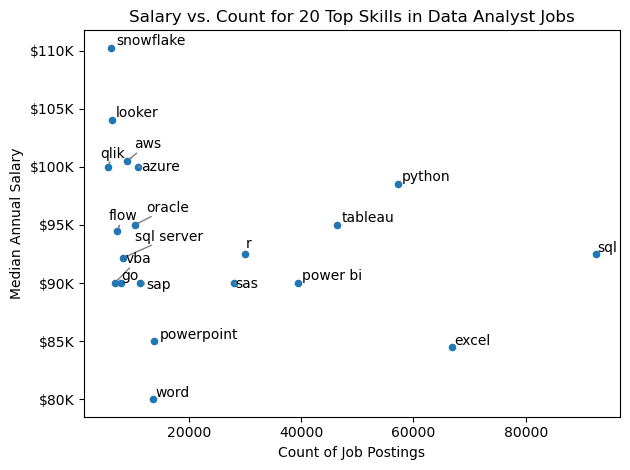

In [57]:
from adjustText import adjust_text
from matplotlib.ticker import FuncFormatter

# (fig, ax) = plt.subplots()
df_da_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for (i,job_skill) in enumerate(df_da_skill_stats.index):
  texts.append(plt.text(df_da_skill_stats['skill_count'].iloc[i], df_da_skill_stats['median_salary'].iloc[i], job_skill))

adjust_text(texts,arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_: f"${int(y/1000)}K"))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Annual Salary')
plt.title(f"Salary vs. Count for {skill_count} Top Skills in Data Analyst Jobs")
plt.tight_layout()
plt.show()

In [55]:
x=90000
f"${int(x/1000)}K"

'$90K'